In [90]:
#Importando las librerias necesarias
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score #Coeficiente de determinación

from matplotlib import pyplot as plt

Experimento 1

In [91]:
#Creando la muestra
X1, y1 = make_regression(
    n_samples=1000, n_features=4,
    n_informative=2, n_targets=1,
    random_state=0, shuffle=False
)

In [92]:
#Diviendo los datos
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [93]:
#Creando el modelo
modelo_bagging_reg_1 = BaggingRegressor(
    base_estimator=SVR(),
    n_estimators=12,
    random_state=0
)

In [94]:
#Entrenando el modelo
modelo_bagging_reg_1 = modelo_bagging_reg_1.fit(X1_train, y1_train)

In [95]:
#Probando el modelo
r2_score(y_true=y1_test, y_pred=modelo_bagging_reg_1.predict(X1_test))

0.7158441985285156

In [96]:
#Verificando gráficamente como afecta el parámetro n_estimators el r2_score
resultado = {}
for i in range(1,20):
    #Creando el modelo
    modelo_bagging_reg_1 = BaggingRegressor(
        base_estimator=SVR(),
        n_estimators=i,
        random_state=0
    )

    #Entrenando el modelo
    modelo_bagging_reg_1 = modelo_bagging_reg_1.fit(X1_train, y1_train)

    #Almacenando el resultado de la evaluación
    resultado[i] = r2_score(
        y_true=y1_test, y_pred=modelo_bagging_reg_1.predict(X1_test)
    )*100


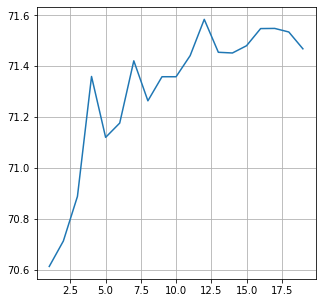

In [97]:
plt.figure(figsize=(5,5))
plt.plot(resultado.keys(), resultado.values())
plt.grid()
plt.show()

Experimento 2

In [98]:
#Creando la muestra
X2, y2 = make_regression(
    n_samples=2000, n_features=1,
    n_informative=2, n_targets=1, 
    shuffle=False
)

In [99]:
#Diviendo los datos
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2,
    y2,
    test_size=0.3, 
    random_state=0
)

In [100]:
#Creando el modelo
modelo_bagging_reg_2 = BaggingRegressor(
    base_estimator=SVR(),
    n_estimators=12,
    random_state=0
)

In [101]:
#Entrenando el modelo
modelo_bagging_reg_2 = modelo_bagging_reg_2.fit(X2_train, y2_train)

In [102]:
#Probando el modelo
r2_score(y_true=y2_test, y_pred=modelo_bagging_reg_2.predict(X2_test))

0.9705733671797163

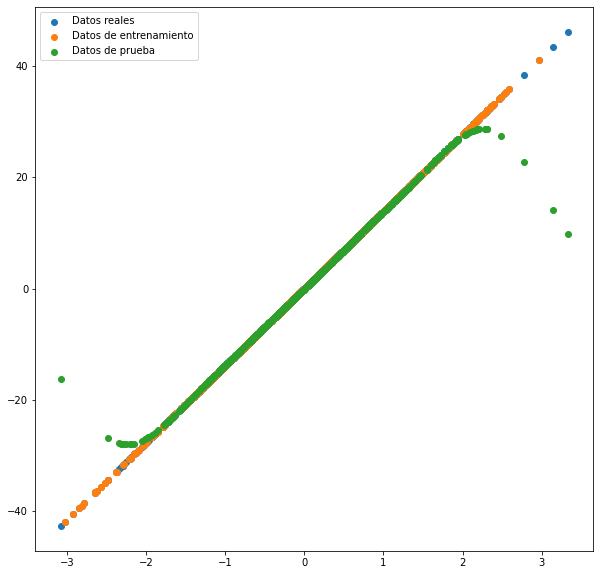

In [103]:
#Verificando todos los datos 
plt.figure(figsize=(10,10))
plt.scatter(X2, y2, label='Datos reales')
plt.scatter(X2_train, y2_train, label='Datos de entrenamiento')
plt.scatter(X2_test, modelo_bagging_reg_2.predict(X2_test), label='Datos de prueba')
plt.legend()
plt.show()